# KeepUp Data Science Interview Challenge
For this exercise, you will analyze a dataset from Amazon. 

### A. (Suggested duration: 90 mins)
With the given data for 548552 products, perform exploratory analysis and make suggestions for further analysis on the following aspects.

1. **Trustworthiness of ratings**  
Ratings are susceptible to manipulation, bias etc. What can you say (quantitatively speaking) about the ratings in this dataset?

2. **Category bloat**  
Consider the product group named 'Books'. Each product in this group is associated with categories. Naturally, with categorization, there are tradeoffs between how broad or specific the categories must be.  
For this dataset, quantify the following:  
a. Is there redundancy in the categorization? How can it be identified/removed?  
b. Is is possible to reduce the number of categories drastically (say to 10% of existing categories) by sacrificing relatively few category entries (say close to 10%)?  

In [1]:
import pandas as pd
import gzip

In [2]:
# Read in the dataset
with gzip.open('amazon-meta.txt.gz', 'rt') as f:
    amazon_meta = f.read()
f.close()

In [3]:
# Parse and group the data by each product
grouped = []
product = []

for line in amazon_meta.split('\n')[3:]:
    if line != '':
        product.append(line)
    else:
        grouped.append(product)
        product = []

In [4]:
grouped[0:3]

[['Id:   0', 'ASIN: 0771044445', '  discontinued product'],
 ['Id:   1',
  'ASIN: 0827229534',
  '  title: Patterns of Preaching: A Sermon Sampler',
  '  group: Book',
  '  salesrank: 396585',
  '  similar: 5  0804215715  156101074X  0687023955  0687074231  082721619X',
  '  categories: 2',
  '   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Preaching[12368]',
  '   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Sermons[12370]',
  '  reviews: total: 2  downloaded: 2  avg rating: 5',
  '    2000-7-28  cutomer: A2JW67OY8U6HHK  rating: 5  votes:  10  helpful:   9',
  '    2003-12-14  cutomer: A2VE83MZF98ITY  rating: 5  votes:   6  helpful:   5'],
 ['Id:   2',
  'ASIN: 0738700797',
  '  title: Candlemas: Feast of Flames',
  '  group: Book',
  '  salesrank: 168596',
  '  similar: 5  0738700827  1567184960  1567182836  0738700525  0738700940',
  '  categories: 2',
  '   |Books[283155]|Subjects[1000]|Re

In [5]:
len(grouped)

548553

#### 1. Trustworthiness of ratings

In [ ]:
# Extract rating info from product group and put them into a dataframe 
rating = pd.DataFrame(columns = ['id', 'total', 'downloaded', 'avg_rating'])
i = 0

for product in grouped:
    idn, total, downloaded, avg_rating = '', '', '', ''
    skip = False
    for item in product:
        if item.startswith('Id:'):
            idn = item.split()[-1]
        elif item.startswith('  reviews:'):
            total = item.split()[2]
            downloaded = item.split()[4]
            avg_rating = item.split()[7]
        elif item.startswith('  discontinued product'):
            skip = True
    if skip == False:
        rating.loc[i] = [idn, total, downloaded, avg_rating]
        if i%1000==0: print('i=', i)
        i += 1

In [10]:
# rating.columns = ['id', 'total', 'downloaded', 'avg_rating']
rating.head()

,id,total,downloaded,avg_rating
0,1,2,2,5
1,2,12,12,4.5
2,3,1,1,5
3,4,1,1,4
4,5,0,0,0


In [15]:
rating.tail()

,id,total,downloaded,avg_rating
542680,548548,8,5,3
542681,548549,1,1,4
542682,548550,3,3,5
542683,548551,1,1,5
542684,,,,


In [16]:
# Remove empty record
rating = rating[rating['id']!='']

In [17]:
len(rating)

542684

In [18]:
rating['id']  = rating['id'].astype(int)
rating['total']  = rating['total'].astype(int)
rating['downloaded']  = rating['downloaded'].astype(int)
rating['avg_rating']  = rating['avg_rating'].astype(float)
rating.head()

,id,total,downloaded,avg_rating
0,1,2,2,5.0
1,2,12,12,4.5
2,3,1,1,5.0
3,4,1,1,4.0
4,5,0,0,0.0


In [36]:
rating.to_csv('rating.csv', index=False)

In [19]:
# Products with more ratings than downloads?
sdf = rating[rating['total'] > rating['downloaded']]

In [20]:
# Take a look at the range of values
sdf['total_download_diff'] = sdf['total'] - sdf['downloaded']
sdf = sdf.sort_values('total_download_diff', ascending=False)
sdf.head()

/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,id,total,downloaded,avg_rating,total_download_diff
146566,148185,5034,5,5.0,5029
98414,99487,5033,5,5.0,5028
127274,128673,4922,5,5.0,4917
248690,251503,2925,5,4.5,2920
375355,379661,2925,5,4.5,2920


In [21]:
sdf.tail()

,id,total,downloaded,avg_rating,total_download_diff
343491,347454,51,50,4.0,1
343636,347601,197,196,4.5,1
343698,347664,1006,1005,4.0,1
159751,161496,226,225,4.0,1
192,193,261,260,3.0,1


In [22]:
# How many are there?
print('There are {} products with more ratings than downloads.'.format(len(sdf)))

There are 8615 products with more ratings than downloads.


In [23]:
import seaborn as sns
%matplotlib inline

/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


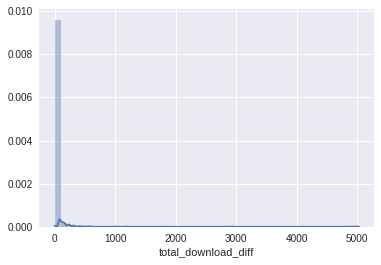

In [24]:
sns.distplot(sdf['total_download_diff'])

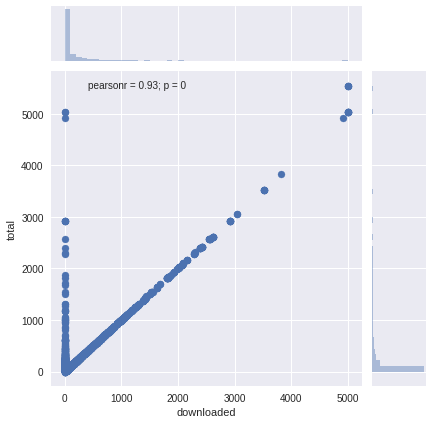

In [25]:
sns.jointplot(x='downloaded', y='total', data=sdf)

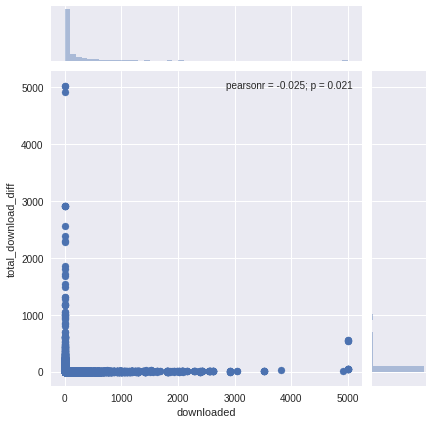

In [26]:
sns.jointplot(x='downloaded', y='total_download_diff', data=sdf)

In [27]:
# What can we say about the range of values where total is greater than downloaded?
len_list = [4000,2000,1000,500,100,50]

for l in len_list:
    print('There are {} products with more than {} reviews greater than the number of downloads.'\
              .format(len(sdf[sdf['total_download_diff'] > l]), l))

There are 3 products with more than 4000 reviews greater than the number of downloads.
There are 12 products with more than 2000 reviews greater than the number of downloads.
There are 28 products with more than 1000 reviews greater than the number of downloads.
There are 56 products with more than 500 reviews greater than the number of downloads.
There are 300 products with more than 100 reviews greater than the number of downloads.
There are 549 products with more than 50 reviews greater than the number of downloads.


As we can see above, some products have a rather unusual amount of total ratings compared to the number of downloaded, which could signify ratings manipulation. 

#### 2. Category bloat

**a. Is there redundancy in the categorization? How can it be identified/removed?**

In [4]:
# Samples
grouped[0:3]

[['Id:   0', 'ASIN: 0771044445', '  discontinued product'],
 ['Id:   1',
  'ASIN: 0827229534',
  '  title: Patterns of Preaching: A Sermon Sampler',
  '  group: Book',
  '  salesrank: 396585',
  '  similar: 5  0804215715  156101074X  0687023955  0687074231  082721619X',
  '  categories: 2',
  '   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Preaching[12368]',
  '   |Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Sermons[12370]',
  '  reviews: total: 2  downloaded: 2  avg rating: 5',
  '    2000-7-28  cutomer: A2JW67OY8U6HHK  rating: 5  votes:  10  helpful:   9',
  '    2003-12-14  cutomer: A2VE83MZF98ITY  rating: 5  votes:   6  helpful:   5'],
 ['Id:   2',
  'ASIN: 0738700797',
  '  title: Candlemas: Feast of Flames',
  '  group: Book',
  '  salesrank: 168596',
  '  similar: 5  0738700827  1567184960  1567182836  0738700525  0738700940',
  '  categories: 2',
  '   |Books[283155]|Subjects[1000]|Re

In [5]:
# Extract category info from each book into a list
category_list = []
book_count = 0

for product in grouped:
    group = ''
    for item in product:
        if item.startswith('  group:'):
            group = item.split()[-1]
        if group == 'Book' and item.startswith('   |'):
            category_list.append(item.strip())
    if group == 'Book':
        book_count += 1

In [6]:
num_category = len(category_list)
num_entry = len(set(category_list))

In [7]:
print('There are {} total books.'.format(book_count))
print('There are {} total category branches across all books.'.format(num_category))
print('There are {} category entries (unique category branches) across all books.'.format(num_entry))

There are 393561 total books.
There are 1440329 total category branches across all books.
There are 12853 category entries (unique category branches) across all books.


From above samples and the checking result, we can see that there is much redundancy in the categorization. It can be identified by the count of category one book belongs. If a book has more than one categories, it is redundancy and we can remove other category except one. 

**b. Is it possible to reduce the number of categories drastically (say to 10% of existing categories) by sacrificing relatively few category entries (say close to 10%)?**

In [8]:
# Get the count of category for each entry in category_list
category_count = pd.Series(category_list).value_counts()
category_count.head(10)

|[265523]|Amazon.com Stores[285080]|Home & Office[764512]|Business & Investing Books[767740]|General[767880]    18438
|Books[283155]|Subjects[1000]|Business & Investing[3]|General[2612]                                             18436
|Books[283155]|Subjects[1000]|Reference[21]|General[408268]                                                     13701
|Books[283155]|Subjects[1000]|Biographies & Memoirs[2]|General[2375]                                            12241
|Books[283155]|Subjects[1000]|Nonfiction[53]|Social Sciences[11232]|Sociology[11288]|General[11289]             11779
|Books[283155]|Subjects[1000]|Literature & Fiction[17]|General[10125]|Contemporary[10129]                       11446
|Books[283155]|Subjects[1000]|Children's Books[4]|Ages 4-8[2785]|General[170062]                                11439
|Books[283155]|Subjects[1000]|Nonfiction[53]|Education[10605]|General[10635]                                     8759
|Books[283155]|Subjects[1000]|Computers & Internet[5]|Ge

In [9]:
category_count.tail(10)

|Books[283155]|Specialty Stores[504360]|Bargain Books[45]|Children[2460]|Literature & Fiction[2469]|Fairy Tales, Folk Tales & Myths[2471]                     1
|Books[283155]|Subjects[1000]|Romance[23]|Authors, A-Z[12831]|( B )[12855]|Booth, Pat[565674]                                                                 1
|Music[5174]|Styles[301668]|Classical[85]|Featured Composers, A-Z[5338]|( S )[31014]|Strauss, Richard[33253]|All Works by Strauss[33267]                      1
|Books[283155]|Subjects[1000]|Mystery & Thrillers[18]|Authors, A-Z[69300]|( G )[69307]|Gallison, Kate[69430]                                                  1
|Books[283155]|Subjects[1000]|Computers & Internet[5]|Databases[549646]|Specific Databases[549648]|Oracle[4092]|Developer Tools[588488]|Discoverer[588498]    1
|Music[5174]|Styles[301668]|Classical[85]|Featured Composers, A-Z[5338]|( G )[19383]|Gluck, Christoph W.[20119]|All Works by Gluck[20126]                     1
|Books[283155]|Subjects[1000]|Horror[49]

In [10]:
len(category_count)

12853

In [11]:
# 10% of existing categories
num_remain_category = int(num_category * 0.1 + 0.5)
# 10% of category entries 
num_new_entry = int(num_entry * 0.1 + 0.5)
print ('10% of existing categories:', num_remain_category)
print('10% of category entries', num_new_entry)

10% of existing categories: 144033
10% of category entries 1285


In [12]:
# How many categories do we need to remove?
num_remove_category = num_category - num_remain_category
print('We need to remove {} categories.'.format(num_remove_category))

We need to remove 1296296 categories.


In [13]:
# We'll see at least how many entries do we need to sacrifice 
# to reduce the number of categories to 10% of existing categories
sum_removed_category = 0
i = 0
while sum_removed_category < num_remove_category:
    sum_removed_category += category_count[i]
    i += 1
num_sacrificed_entry = i
print ('We need to sacrifice {} entries to reduce the number of categories to 10% of existing categories.'.format(num_sacrificed_entry))

We need to sacrifice 3416 entries to reduce the number of categories to 10% of existing categories.


In [14]:
percent_entry = num_sacrificed_entry / num_entry
print ('We need to sacrifice {0:.2f}% entries.'.format(percent_entry*100))

We need to sacrifice 26.58% entries.


We need to sacrifice 26.58% entries at least to reduce the number of categories to 10% of existing categories. So it is not possible to reduce the number of categories drastically (say to 10% of existing categories) by sacrificing relatively few category entries (say close to 10%)

--------------------------------

### B. (Suggested duration: 30 mins)
Give the number crunching a rest! Just think about these problems.
1. **Algorithm thinking**    
How would build the product categorization from scratch, using similar/co-purchased information?

2. **Product thinking**    
Now, put on your 'product thinking' hat.    
a. Is it a good idea to show users the categorization hierarchy for items?  
b. Is it a good idea to show users similar/co-purchased items?  
c. Is it a good idea to show users reviews and ratings for items?  
d. For each of the above, why? How will you establish the same? 

#### Solutions:

__1. Algorithm thinking__  
To build the product categorization from scratch, I would use similar/co-purchased information to perform clustering with unsupervised machine learning. I may use k-means clustering to create product categories.

__2. Product thinking__  
a. It is not a good idea to show users the categorization hierarchy for items. Too much information will cause overload and distract users' attention from item he is viewing.   
b. It is a good idea to show users similar/co-purchased items. Because these items are frequently bought by other customers along with the main item of interest, users may also need those additional items.   
c. It is a good idea to show users reviews and ratings for items. Since they can serve as the reference and validation of the products. It also provide a community for users to share their commends and experiments about the items. 
